In [1]:
import os
import importlib
from timeit import timeit
import logging
import sys
import importlib
import time

import numpy as np
import pandas as pd
import scipy
import h5py
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import numba

import network
import evidence
import utils
import browser
import interface
import database
import annotation

import sandbox

formatter = logging.Formatter(
    '%(asctime)s > %(message)s'
)
logger = logging.getLogger('network_log')
logger.setLevel(logging.DEBUG)
console_handler = logging.StreamHandler(stream=sys.stdout)
console_handler.setLevel(logging.DEBUG)
console_handler.setFormatter(formatter)
logger.addHandler(console_handler)

parameters = utils.read_parameters_from_json_file(default="evidence")

def reload():
    importlib.reload(network)
    importlib.reload(evidence)
    importlib.reload(utils)
    importlib.reload(browser)
    importlib.reload(interface)
    importlib.reload(sandbox)
    importlib.reload(database)
    importlib.reload(annotation)

In [2]:
reload()

inets = []
# in_folder = "/home/sander/Documents/Proteomics/data/ion_networks"
in_folder = "/home/sander/Documents/Proteomics/data/ecoli"
# in_folder = "/home/sander/Documents/Proteomics/data/jpt/APEX"
for file_name in utils.get_file_names_with_extension([in_folder], ".inet.hdf"):
    inets.append(
        network.Network(
            file_name
        )
    )
    
evis = []
# in_folder = "/home/sander/Documents/Proteomics/data/ion_networks"
for i, file_name in enumerate(utils.get_file_names_with_extension([in_folder], ".evidence.hdf")):
    evis.append(
        evidence.Evidence(
            file_name,
            inets[i]
        )
    )

In [7]:
self_inet = inets[0]
self_evi = evis[0]
other_inet = inets[1]
other_evi = evis[1]

self_alignment = self_evi.get_aligned_nodes_from_group(
    other_evi.file_name_base,
    return_as_mask=False
)
other_alignment = other_evi.get_aligned_nodes_from_group(
    self_evi.file_name_base,
    return_as_mask=False
)
# other_logints = inets[other_name].get_ion_coordinates(
#     "FRAGMENT_LOGINT",
#     indices=other_alignment
# )
# logints[i, self_alignment] = other_logints

<IPython.core.display.Javascript object>


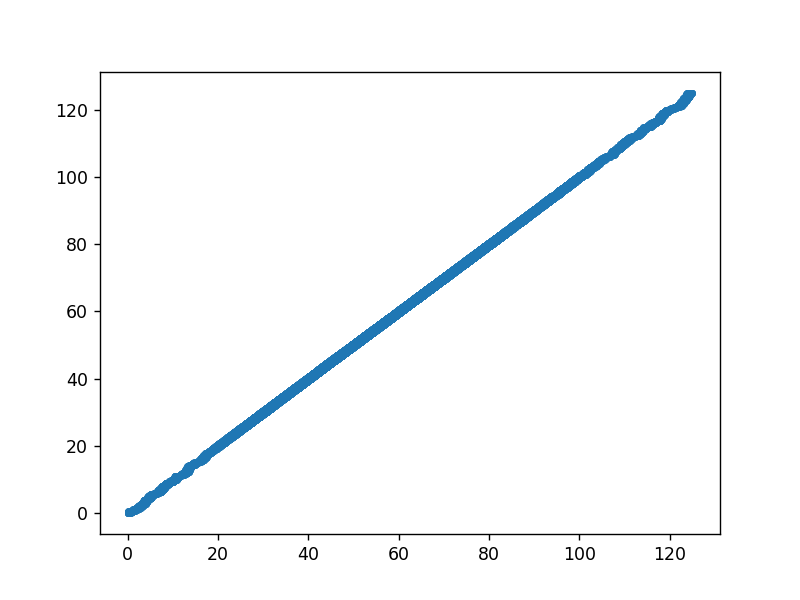

In [11]:
%matplotlib notebook

a1 = self_inet.get_ion_coordinates("PRECURSOR_RT", indices = self_alignment)
a2 = other_inet.get_ion_coordinates("PRECURSOR_RT", indices = other_alignment)

plt.scatter(a1, a2, marker=".")

In [19]:
import matplotlib
matplotlib.colors.__dict__['CSS4_COLORS']

TypeError: 'dict' object is not callable

In [ ]:
reload()

an = annotation.Annotation(
    evidence=evis[0],
    database="/home/sander/Documents/Proteomics/data/databases/hdf/crap_ecoli_concatenated_decoy.hdf",
    parameters={
        "annotation_ppm": 20,
    },
    logger=logger
)

In [ ]:
self=inets[1]
# indptr, indices = self.get_edges(
#     indptr_and_indices=True
# )
# x, y = self.get_edges(return_as_scipy_csr=False)

In [ ]:
rts = self.get_ion_coordinates("PRECURSOR_RT")
rts[:1000000]

In [ ]:
reload()

self = inets[0]
other = inets[1]
# self_ints, self_mzs, self_pmzs, self_rts = self.get_ion_coordinates()
# other_ints, other_mzs, other_pmzs, other_rts = other.get_ion_coordinates()
# calibrated_self_rts = sandbox.calibrate_precursor_rt(self, other, ppm=10)

In [ ]:
self_mzs = pd.read_csv(
    "/home/sander/Documents/Proteomics/data/jpt/APEX/200117_JPTmix_prop_Fullloop_01_Apex3DIons.inet.csv",
    usecols=["FRAGMENT_MZ"]
).values.flatten()
other_mzs = pd.read_csv(
    "/home/sander/Documents/Proteomics/data/jpt/APEX/200117_JPTmix_prop_Fullloop_08_Apex3DIons.inet.csv",
    usecols=["FRAGMENT_MZ"]
).values.flatten()

self_logints = pd.read_csv(
    "/home/sander/Documents/Proteomics/data/jpt/APEX/200117_JPTmix_prop_Fullloop_01_Apex3DIons.inet.csv",
    usecols=["FRAGMENT_LOGINT"]
).values.flatten()
other_logints = pd.read_csv(
    "/home/sander/Documents/Proteomics/data/jpt/APEX/200117_JPTmix_prop_Fullloop_08_Apex3DIons.inet.csv",
    usecols=["FRAGMENT_LOGINT"]
).values.flatten()

In [ ]:
# le_indices = np.concatenate(
#     [
#         start + np.argpartition(
#             ions["INTENSITY"][start: end], - to_select_per_sample
#         )[-to_select_per_sample:] for start, end in zip(
#             start_indices[:-1],
#             start_indices[1:]
#         )
#     ]
# )


In [ ]:
calibration_ions = 50000
self_ions = np.argpartition(self_logints, -calibration_ions)[-calibration_ions:]
other_ions = np.argpartition(other_logints, -calibration_ions)[-calibration_ions:]

In [ ]:
self_mzs = self_mzs[self_ions]
other_mzs = other_mzs[other_ions]

In [ ]:
np.sort(self_mzs), np.sort(other_mzs)

In [ ]:
self_mzs = self.get_ion_coordinates("FRAGMENT_MZ")
other_mzs = other.get_ion_coordinates("FRAGMENT_MZ")
# self_indices, other_indices = sandbox.quick_align(self_mzs, other_mzs, ppm=10)
# self_rts = self.get_ion_coordinates("PRECURSOR_RT")
# other_rts = other.get_ion_coordinates("PRECURSOR_RT", indices=other_indices)

In [ ]:
self_inds = np.repeat(0, len(self_mzs))
other_inds = np.repeat(1, len(other_mzs))

In [ ]:
mzs = np.concatenate([self_mzs, other_mzs])
inds = np.concatenate([self_inds, other_inds])
order = np.argsort(mzs)
mzs = mzs[order]
inds = inds[order]

In [ ]:
mz_diffs = np.diff(mzs)
ind_diffs = np.diff(inds)
x = np.concatenate([mz_diffs[ind_diffs==1], -mz_diffs[ind_diffs==-1]])

In [ ]:
x = (mz_diffs[:-2] < mz_diffs[1:-1]) & (mz_diffs[1:-1] < mz_diffs[2:])
x &= ind_diffs[1:-1] != 0
x = mz_diffs[1:-1][x] * -ind_diffs[1:-1][x]

In [ ]:
np.quantile(
    mz_diffs[ind_diffs==-1] * 10**6 / mzs[:-1][ind_diffs==-1],
    0.5
)

In [ ]:
%matplotlib notebook

# s = np.concatenate([mz_diffs[ind_diffs==1], -mz_diffs[ind_diffs==-1]])

plt.scatter(
    mzs[:-1][ind_diffs==1],
    mz_diffs[ind_diffs==1] * 10**6 / mzs[:-1][ind_diffs==1]
#     np.sort(self_mzs),
#     np.sort(other_mzs) - np.sort(self_mzs),
#     10**6 * (np.sort(self_mzs) - np.sort(other_mzs)) / np.sort(self_mzs)
)

In [ ]:
%matplotlib notebook

a, b = np.unique(np.round(x,3), return_counts=True)
print(np.quantile(x, np.arange(101)/100), np.median(x))
# plt.plot(a,b)
plt.plot(np.quantile(x, np.arange(101)/100))

In [ ]:
new_self_rts = []
for self_start_index, self_end_index, other_rt_start, other_rt_end in zip(
    self_indices[:-1],
    self_indices[1:],
    other_rts[:-1],
    other_rts[1:]
):
#     if self_end_index == self_start_index:
#         continue
    self_rt_start = self_rts[self_start_index]
    self_rt_end = self_rts[self_end_index]
    if self_rt_start == self_rt_end:
        new_rts = np.repeat(other_rt_start, self_end_index - self_start_index)
    else:
        slope = (other_rt_end - other_rt_start) / (self_rt_end - self_rt_start)
        new_rts = other_rt_start + slope * (
            self_rts[self_start_index: self_end_index] - self_rt_start
        )
    new_self_rts.append(new_rts)
new_self_rts.append([other_rts[-1]])
new_self_rts = np.concatenate(new_self_rts)

In [ ]:
new_self_rts.shape[0] - self_rts.shape[0]

In [ ]:
self_rts = self.get_ion_coordinates("PRECURSOR_RT")

In [ ]:
%matplotlib notebook

plt.scatter(self_rts, self_rts - calibrated_self_rts)

In [ ]:
reload()

self_ints, self_mzs, self_dts, self_rts = self.get_ion_coordinates()
other_ints, other_mzs, other_dts, other_rts = other.get_ion_coordinates()
self_indices, other_indices = sandbox.quick_align(self_mzs, other_mzs, ppm=10)

In [ ]:
# s = slice(0, None, 1000)
a1 = self_rts[self_indices]
a2 = other_rts[other_indices]
c = self_dts[self_indices] - other_dts[other_indices]

In [ ]:
ppm=10

self_mz_order = np.argsort(self_mzs)
other_mz_order = np.argsort(other_mzs)
max_mz_diff = 1 + ppm * 10**-6
low_limits = np.searchsorted(
    self_mzs[self_mz_order],
    other_mzs[other_mz_order] / max_mz_diff,
    "left"
)
high_limits = np.searchsorted(
    self_mzs[self_mz_order],
    other_mzs[other_mz_order] * max_mz_diff,
    "right"
)
other_rt_order = np.argsort(other_mz_order)
self_indices = np.concatenate(
    [
        self_mz_order[l:h] for l, h in zip(
            low_limits[other_rt_order],
            high_limits[other_rt_order]
        )
    ]
)
other_indices = np.repeat(
    np.arange(len(other_rt_order)),
    high_limits[other_rt_order] - low_limits[other_rt_order]
)

In [ ]:
%matplotlib notebook

plt.plot(a1, a2)

In [ ]:
%matplotlib notebook

# plt.plot(a1, a2)
# plt.scatter(a1, a2, marker=".", c=c, cmap="RdYlGn")
# sns.jointplot(a1, a2, kind="hex", gridsize=200)
# sns.jointplot(self_rts[self_indices], other_rts[other_indices], kind="hex", gridsize=100)
plt.scatter(self_rts[self_indices], other_rts[other_indices], marker=".")

In [ ]:
%matplotlib notebook

a,b=np.unique(np.round(c,0), return_counts=True)
plt.plot(a,b)

In [ ]:
self_rts = self.get_ion_coordinates("PRECURSOR_RT")
other_rts = other.get_ion_coordinates("PRECURSOR_RT", indices=other_indices)
new_self_rts = []
for self_start_index, self_end_index, other_rt_start, other_rt_end in zip(
    self_indices[:-1],
    self_indices[1:],
    other_rts[:-1],
    other_rts[1:]
):
    self_rt_start = self_rts[self_start_index]
    self_rt_end = self_rts[self_end_index]
    if self_rt_start == self_rt_end:
        new_rts = np.repeat(other_rt_start, self_end_index - self_start_index)
    else:
        slope = (other_rt_end - other_rt_start) / (self_rt_end - self_rt_start)
        new_rts = other_rt_start + slope * (
            self_rts[self_start_index: self_end_index] - self_rt_start
        )
    new_self_rts.append(new_rts)
new_self_rts.append([other_rts[-1]])
new_self_rts = np.concatenate(new_self_rts)

In [ ]:
# %matplotlib notebook

# s = slice(0, None, 1000)
# plt.scatter(new_self_rts[s], self_rts[s])

In [ ]:
ints, mzs, pmzs, rts = inets[0].get_ion_coordinates()

In [ ]:
reload()

ali = evis[0].get_alignment(evis[1])
# pairwise_alignment = inets[0].align_nodes(
#     inets[1],
#     parameters
# )
# ali = [
#     pairwise_alignment.T.tocsr().indices,
#     pairwise_alignment.indices
# ]
# a = np.repeat(np.arange(pairwise_alignment.shape[0]), np.diff(pairwise_alignment.indptr))
# aa = pairwise_alignment.nonzero()[0]
# a,aa,np.bincount(a==aa)

In [ ]:
def rt_diffs(isotopic_distance, ppm, rts):
    mz_order = np.argsort(mzs)
    mzs_in_mz_order = mzs[mz_order]
    if isotopic_distance > 0:
        lower_limits = np.searchsorted(
            mzs_in_mz_order,
            (mzs_in_mz_order + isotopic_distance) / (1 + ppm * 10**-6),
            "left"
        )
    else:
        lower_limits = np.arange(len(mzs)) + 1
    upper_limits = np.searchsorted(
        mzs_in_mz_order,
        (mzs_in_mz_order + isotopic_distance) * (1 + ppm * 10**-6),
        "right"
    )
    first_isotopic_pairs = np.repeat(mz_order, upper_limits - lower_limits)
    second_isotopic_pairs = np.concatenate([mz_order[l: u] for u, l in zip(upper_limits, lower_limits)])
    return np.abs(rts[first_isotopic_pairs] - rts[second_isotopic_pairs])

In [ ]:
isotopic_rts = rt_diffs(isotopic_distance = 1.002, ppm=2, rts=rts)
random_rts = rt_diffs(isotopic_distance = 3.8254, ppm=2, rts=rts)

In [ ]:
all_rts = np.concatenate([isotopic_rts, random_rts])
all_labels = np.repeat([False, True], [len(isotopic_rts), len(random_rts)])
order = np.argsort(all_rts)
all_rts = all_rts[order]
all_labels = all_labels[order]
fdr = np.cumsum(all_labels) / (1 + np.arange(len(all_labels)))

In [ ]:
np.argmin(fdr)

In [ ]:
%matplotlib notebook

s = slice(0,10000000, 1)
plt.plot(all_rts[s], fdr[s])

In [ ]:
isotope_rt_diffs, isotope_count = np.unique(
        isotopic_rts,
        return_counts=True
    )
isotope_count = np.cumsum(isotope_count)
random_rt_diffs, random_count = np.unique(
        random_rts,
        return_counts=True
    )
random_count = np.cumsum(random_count)

In [ ]:
# random_diffs = isotope_rt_diffs
# random_counts = isotope_count

In [ ]:
%matplotlib notebook

# plt.plot(
#     *np.unique(
#         np.round(
#             rts[first_isotopic_pairs] - rts[second_isotopic_pairs],
#             3
#         ),
#         return_counts=True
#     )
# )


plt.plot(
    isotope_rt_diffs, isotope_count/isotope_count[-1]
)
plt.plot(
    random_rt_diffs, random_count/random_count[-1]
)
# plt.plot(
#     random_diffs, random_counts/random_counts[-1]+0.0029-0.001, c="r"
# )
# plt.plot(
#     random_diffs, random_counts/random_counts[-1]+0.0029+0.0015, c="r"
# )
# plt.plot(
#     random_diffs, random_counts/random_counts[-1], c="r"
# )
plt.axhline(0.5, c="grey")
plt.axvline(0, c="grey")
# plt.plot([-15,15], [0.313,0.69])

# plt.plot(
#     isotope_rt_diffs,
#     np.gradient(isotope_count),
# )

In [ ]:
%matplotlib notebook

ricos = np.diff(isotope_count) / np.diff(isotope_rt_diffs)
plt.plot(isotope_rt_diffs[:-1], ricos)

In [ ]:
%matplotlib notebook

sns.jointplot(
    rts[first_isotopic_pairs[::10]],
    rts[second_isotopic_pairs[::10]],
    kind="hex",
    gridsize=500
)

In [ ]:
%matplotlib notebook

sns.jointplot(
    inets[0].get_ion_coordinates("FRAGMENT_LOGINT", indices=ali[:,0]),
    inets[1].get_ion_coordinates("FRAGMENT_LOGINT", indices=ali[:,1]),
    kind="hex",
    gridsize=500
)

In [ ]:
left, right = inets[0].get_edges(return_as_scipy_csr=False)
mzs = inets[0].get_ion_coordinates("MZ2")
diffs2 = mzs[left] - mzs[right]

In [ ]:
z = evidences[0].get_evidence(network_keys=[k.key for k in inets[1:]], return_total=True)

In [ ]:
edges = inets[0].get_edges()
edges.data = z[0] > z[1] + 8
edges.eliminate_zeros()
left, right = edges.nonzero()
mzs = inets[0].get_ion_coordinates("MZ2")
diffs = mzs[left] - mzs[right]

In [ ]:
# ori_a, ori_b = np.unique(np.round(diffs2, 3), return_counts=True)
new_a, new_b = np.unique(np.round(diffs, 3), return_counts=True)

In [ ]:
%matplotlib notebook

plt.plot(ori_a, ori_b/np.max(ori_b))
plt.plot(new_a, new_b/np.max(new_b))

In [ ]:
mzs = inets[0].get_ion_coordinates("MZ2")
diffs = np.abs(mzs[left] - mzs[right])
good = np.abs(diffs - 1.002) < 0.01

In [ ]:
inets[0].get_ion_coordinates(indices=z[0])

In [ ]:
posi = z[0][good]
negi = z[1][good]
np.bincount(posi), np.bincount(negi)

In [ ]:
# iso = np.histogram2d(posi, negi, bins=10)[0].astype(np.int)
# total = np.histogram2d(z[0], z[1], bins=10)[0].astype(np.int)
iso, total

In [ ]:
%matplotlib notebook
# sns.heatmap(np.log(iso/total), cmap="RdYlGn")
sns.heatmap(np.log(iso + 1), cmap="RdYlGn")

In [ ]:
selected = (z[0] + z[1]) > 0
# np.unique(z[0][selected] / (z[0] + z[1])[selected], return_counts=True)
a, b = np.unique(z[0][selected]-z[1][selected], return_counts=True)

In [ ]:
%matplotlib notebook

plt.plot(a, b)

In [ ]:
%matplotlib notebook

first_mz2, first_rt1, first_mz1, first_logint = inets[0].get_ion_coordinates(["MZ2", "RT", "MZ1", "LOGINT"])
second_mz2, second_rt2, second_mz1, second_logint = inets[1].get_ion_coordinates(["MZ2", "RT", "MZ1", "LOGINT"])
a = al.get_alignment(inets[0], inets[1], return_as_scipy_csr=False)

sns.jointplot(first_mz1, first_mz2, kind="hex", gridsize=500)
sns.jointplot(first_logint[a[:,0]], second_logint[a[:,1]], kind="hex", gridsize=500)

In [ ]:
importlib.reload(network)
mzs, rts = inet.get_ion_coordinates(["MZ2", "RT"])
isotopic_distance = 1.002
ppm = 10

isotope_rt_diffs, isotope_count = network.determine_isotopic_rt_difference(
    mzs,
    rts,
    isotopic_distance,
    ppm
)

In [ ]:
# mz_order = np.argsort(mzs)
# mzs_in_mz_order = mzs[mz_order]
# print(mzs_in_mz_order, (mzs_in_mz_order + isotopic_distance) * (1 + ppm * 10**-6))
rts

In [ ]:
ratios = []
resolution = np.linspace(0,1,100)
lower_limits = np.arange(len(rts)) + 1
for limit in resolution:
    upper_limits = np.searchsorted(
        rts,
        rts + limit,
        "right"
    )
    total = np.sum(upper_limits-lower_limits)
    ratio = isotope_count[np.searchsorted(isotope_rt_diffs, limit, "right")] / total
    ratios.append(ratio)

In [ ]:
%matplotlib notebook

plt.plot(resolution, ratios)

In [ ]:
%matplotlib notebook


plt.plot(isotope_rt_diffs, isotope_count / isotope_count[-1])

In [ ]:
indptr, indices = inet.get_edge_indptr_and_indices()

In [ ]:
second_indices = np.repeat(np.arange(len(indptr) - 1), np.diff(indptr))

In [ ]:
%matplotlib notebook

mzs = inet.get_ion_coordinates("MZ2")
diffs = np.abs(mzs[indices]-mzs[second_indices])

plt.plot(*np.unique(np.round(diffs,2), return_counts=True))

# plt.scatter(mzs[pairs[:,0]], diffs, marker=".")
# mzds = mzs[pairs[:,0]] - mzs[pairs[:,1]]
# sns.jointplot(mzs[pairs[:,0]], mzs[pairs[:,0]]-mzs[pairs[:,1]], kind="hex", gridsize=100)

In [ ]:
importlib.reload(network)
inet1 = network.Network(
    "/home/sander/Documents/Proteomics/data/ion_networks/ecoli_sonar/ion_networks/28Oct2016_060_Apex3DIons.hdf"
)
inet2 = network.Network(
    "/home/sander/Documents/Proteomics/data/tmp.hdf"
)
# inet.logger=logger

In [ ]:
coords = inet2.get_ion_coordinates(inet2.dimensions)
print(inet2.dimensions)

In [ ]:
%matplotlib notebook

selection = (coords[3] > 30) & (coords[3] < 31)
# selection=...

# sns.jointplot(coords[1][selection], coords[2][selection], kind="hex", gridsize=200)
plt.scatter(coords[1][selection], coords[3][selection], marker=".", c=coords[0][selection], cmap="RdYlGn")

In [ ]:
%matplotlib notebook
coords = inet2.get_ion_coordinates(inet2.dimensions)
print(inet2.dimensions)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

selection = (coords[3] > 30) & (coords[3] < 30.2)
selection &= (coords[2] < 2000)
selection &= (coords[1] < 900)
# selection=...

# sns.jointplot(coords[1][selection], coords[2][selection], kind="hex", gridsize=200)
ax.scatter(
    coords[1][selection],
    coords[3][selection],
    coords[2][selection],
    marker=".",
    c=coords[0][selection],
    cmap="RdYlGn"
)
ax.set_xlabel('MZ1')
ax.set_ylabel('RT')
ax.set_zlabel('MZ2')

In [ ]:
%matplotlib notebook
coords = inet1.get_ion_coordinates(inet1.dimensions)
print(inet1.dimensions)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

selection = (coords[3] > 30) & (coords[3] < 31)
selection &= (coords[2] < 2000)
selection &= (coords[1] < 900)
# selection=...

# sns.jointplot(coords[1][selection], coords[2][selection], kind="hex", gridsize=200)
ax.scatter(
    coords[1][selection],
    coords[3][selection],
    coords[2][selection],
    marker=".",
    c=coords[0][selection],
    cmap="RdYlGn"
)
ax.set_xlabel('MZ1')
ax.set_ylabel('RT')
ax.set_zlabel('MZ2')

In [ ]:
importlib.reload(network)
importlib.reload(alignment)
inets = []
in_folder = "/home/sander/Documents/Proteomics/data/ion_networks/ecoli_sonar/ion_networks"
for file_name in sorted(os.listdir(in_folder)):
    in_file_name = os.path.join(in_folder, file_name)
    inet = network.Network(
        in_file_name
    )
    inets.append(inet)
al = alignment.Alignment(
    "/home/sander/Documents/Proteomics/data/ion_networks/ecoli_sonar/alignment/alignment.hdf"
#     "/home/sander/Documents/Proteomics/data/ion_networks/dda/dda_sonar_test_align.hdf"
)

In [ ]:
importlib.reload(alignment)
al = alignment.Alignment(
    "/home/sander/Documents/Proteomics/data/ion_networks/ecoli_sonar/alignment/alignment.hdf"
#     "/home/sander/Documents/Proteomics/data/ion_networks/dda/dda_sonar_test_align.hdf"
)

In [ ]:
%matplotlib notebook

# inets = [
#     network.Network("/home/sander/Documents/Proteomics/data/ion_networks/dda/tmp.hdf"),
#     network.Network("/home/sander/Documents/Proteomics/data/ion_networks/ecoli_sonar/ion_networks/28Oct2016_060_Apex3DIons.hdf")
# ]
i = 0
j = 1
dimension = "LOGINT"

x1, x2, x3, x4 = al.get_alignment(inets[i], inets[j])
array1 = inets[i].get_ion_coordinates(dimension)[x1]
array2 = inets[j].get_ion_coordinates(dimension)[x2]

# plt.scatter(array1, array2, marker=".")
sns.jointplot(array1, array2, kind="hex", gridsize=500)

In [ ]:
import sandbox
importlib.reload(sandbox)
edges1, edges2, ali = sandbox.align_edges(inets[0], inets[1], al)
edges1, edges2, ali

In [ ]:
indirect = (ali.T * edges1 * ali).tocsr()

In [ ]:
positive = indirect.multiply(edges2)

In [ ]:
available = edges2 * ali.T * ali

In [ ]:
negative = available - positive

In [ ]:
edges2, indirect, available, positive, negative

In [ ]:
mzs = inets[1].get_ion_coordinates("MZ2")

In [ ]:
%matplotlib notebook

first_indices, second_indices = edges2.nonzero()
diffs = np.abs(mzs[first_indices]-mzs[second_indices])
a, b = np.unique(np.round(diffs,2), return_counts=True)

plt.plot(a, b / np.average(b))

first_indices, second_indices = negative.nonzero()
diffs = np.abs(mzs[first_indices]-mzs[second_indices])
a, b = np.unique(np.round(diffs,2), return_counts=True)

plt.plot(a, b / np.average(b))

first_indices, second_indices = positive.nonzero()
diffs = np.abs(mzs[first_indices]-mzs[second_indices])
a, b = np.unique(np.round(diffs,2), return_counts=True)

plt.plot(a, b / np.average(b))

In [ ]:
np.unique(positive.data)

In [ ]:
inets[0].node_count

In [ ]:
posi = evis[0].get_edge_mask_from_group()
negi = evis[0].get_edge_mask_from_group(positive=False)

In [ ]:
first, second = evis[0].ion_network.get_edges().nonzero()

In [ ]:
posis = (posi == 9) & (negi == 0)
negis = (posi == 0) & (negi == 9)

In [ ]:
first_posi = first[posis]
second_posi = second[posis]
first_negi = first[negis]
second_negi = second[negis]

In [ ]:
posi_rtd = rts[second_posi] - rts[first_posi]
negi_rtd = rts[second_negi] - rts[first_negi]

In [ ]:
posi_rt_diffs, posi_count = np.unique(
        posi_rtd,
        return_counts=True
    )
posi_count = np.cumsum(posi_count)
negi_rt_diffs, negi_count = np.unique(
        negi_rtd,
        return_counts=True
    )
negi_count = np.cumsum(negi_count)

In [ ]:
%matplotlib notebook

plt.plot(
    posi_rt_diffs, posi_count / posi_count[-1]
)
plt.plot(
    negi_rt_diffs, negi_count / negi_count[-1]
)

In [ ]:
reload()

interface.Interface.create_database(
    input_path=[
        "/home/sander/Documents/Proteomics/data/databases/fasta/ecoli.fasta",
        "/home/sander/Documents/Proteomics/data/databases/fasta/crap.fasta",
    ],
    output_directory="/home/sander/Documents/Proteomics/data/databases/hdf",
    parameter_file_name="",
    log_file_name=None
)

In [ ]:
reload()

db = database.Database("/home/sander/Documents/Proteomics/data/databases/hdf/crap_ecoli_concatenated_decoy.hdf")
db_mzs = db.get_fragment_coordinates("mz")

In [ ]:
reload()

an = annotation.Annotation(
    evidence=evis[0],
    database="/home/sander/Documents/Proteomics/data/databases/hdf/crap_ecoli_concatenated_decoy.hdf",
    parameters={
        "annotation_ppm": 20,
    },
    logger=logger
)

In [ ]:
mzs = inets[0].get_ion_coordinates("FRAGMENT_MZ")

In [ ]:
db.get_peptide_coordinates("sequence").dtype == np.dtype('O')

In [ ]:
reload()

an = annotation.Annotation(
    evidence=evis[0]
)
low_peptide_indices, high_peptide_indices = an.get_candidate_peptide_indices_for_nodes(
    db,
    {"annotation_ppm": 10}
)

In [ ]:
np.flatnonzero(high_peptide_indices - low_peptide_indices)

In [ ]:
db_peptides = db.get_fragment_coordinates("peptide_index")
indptr, indices = an.ion_network.get_edges(
    indptr_and_indices=True
)

In [ ]:
@numba.njit(parallel=True)
def nb_isin(array1, array2):
    out = np.empty(array1.shape[0], np.bool_)
    array2_set = set(array2)
    for i in numba.prange(array1.shape[0]):
        out[i] = array1[i] in array2_set
    return out


@numba.njit
def annotate_edges(
    indptr,
    indices,
    low_peptide_indices,
    high_peptide_indices,
    db_peptides,
    max_batch
):
    result_indptr = np.empty(indptr[-1], np.int64)
    result_indices = np.empty(max_batch, np.int64)
    current_index = 0
#     max_batch = np.max(np.diff(indptr) * (high_peptide_indices - low_peptide_indices))
    for start, end, low, high in zip(
        indptr[:-1],
        indptr[1:],
        low_peptide_indices,
        high_peptide_indices,
    ):
        if (low == high) or (start == end):
            result_indptr[start:end] = current_index
            continue
        if ((end - start) * (high - low) + current_index) >= result_indices.shape[0]:
            new_result_indices = np.empty(max_batch + current_index, np.int64)
            new_result_indices[:current_index] = result_indices
            result_indices = new_result_indices
        peptide_candidates = db_peptides[low: high]
        peptide_candidates_set = set(peptide_candidates)
        neighbors = indices[start: end]
        for i, neighbor in enumerate(neighbors):
            neighbor_low = low_peptide_indices[neighbor]
            neighbor_high = high_peptide_indices[neighbor]
            if neighbor_low == neighbor_high:
                result_indptr[start + i] = current_index
                continue
            neighbor_peptide_candidates = db_peptides[neighbor_low: neighbor_high]
            for neighbor_peptide_candidate in neighbor_peptide_candidates:
                if neighbor_peptide_candidate in peptide_candidates_set:
                    result_indices[current_index] = neighbor_peptide_candidate
                    current_index += 1
            result_indptr[start + i] = current_index
    result_indptr[1:] = result_indptr[:-1]
    result_indptr[0] = 0
    return result_indptr, result_indices[:current_index]

In [ ]:
a, aa = annotate_edges(
    indptr[:100],
    indices,
    low_peptide_indices,
    high_peptide_indices,
    db_peptides,
    np.max(np.diff(indptr) * (high_peptide_indices - low_peptide_indices))
)

In [ ]:
import multiprocessing as mp


def pfunction(function):
    def starred_function(*args, **kwargs):
        return function(*args, **kwargs)
    return starred_function


def star_annotate(args, **kwargs):
    return annotate_edges(*args, **kwargs)

# with mp.Pool(8) as p:
#     r = p.map(
#         star_annotate,
#         [
#             (
#                 indptr[i * int(np.ceil(len(indptr) / 8)): (i + 1) * int(np.ceil(len(indptr) / 8))],
#                 indices,
#                 low_peptide_indices,
#                 high_peptide_indices,
#                 db_peptides,
#                 np.max(np.diff(indptr) * (high_peptide_indices - low_peptide_indices))
#             ) for i in range(8)
#         ]
#     )

In [ ]:
r

In [ ]:
%matplotlib notebook

plt.plot(np.bincount(x))

In [ ]:
@sandbox.generate_in_parallel(cpu_count=4)
@numba.njit
def annotate_edges(
    selection,
    indptr,
    indices,
    low_peptide_indices,
    high_peptide_indices,
    db_peptides,
    max_batch
):
    result_indptr = np.empty(indptr[-1], np.int64)
    result_indices = np.empty(max_batch, np.int64)
    current_index = 0
#     max_batch = np.max(np.diff(indptr) * (high_peptide_indices - low_peptide_indices))
    for select in selection:
        start = indptr[select]
        end = indptr[select + 1]
        low = low_peptide_indices[select]
        high = high_peptide_indices[select]
        if (low == high) or (start == end):
            result_indptr[start:end] = current_index
            continue
        if ((end - start) * (high - low) + current_index) >= result_indices.shape[0]:
            new_result_indices = np.empty(max_batch + current_index, np.int64)
            new_result_indices[:current_index] = result_indices
            result_indices = new_result_indices
        peptide_candidates = db_peptides[low: high]
        peptide_candidates_set = set(peptide_candidates)
        neighbors = indices[start: end]
        for i, neighbor in enumerate(neighbors):
            neighbor_low = low_peptide_indices[neighbor]
            neighbor_high = high_peptide_indices[neighbor]
            if neighbor_low == neighbor_high:
                result_indptr[start + i] = current_index
                continue
            neighbor_peptide_candidates = db_peptides[neighbor_low: neighbor_high]
            for neighbor_peptide_candidate in neighbor_peptide_candidates:
                if neighbor_peptide_candidate in peptide_candidates_set:
                    result_indices[current_index] = neighbor_peptide_candidate
                    current_index += 1
            result_indptr[start + i] = current_index
    result_indptr[1:] = result_indptr[:-1]
    result_indptr[0] = 0
    return result_indptr[indptr[selection[0]]: indptr[selection[-1]]].copy(), result_indices[:current_index].copy()

In [ ]:
k = [ 
    i for i in annotate_edges(
#         [indptr[i*100:(i+1)*100+1] for i in range(4)],
        np.arange(0, 100),
        indptr,
        indices,
        low_peptide_indices,
        high_peptide_indices,
        db_peptides,
        np.max(np.diff(indptr) * (high_peptide_indices - low_peptide_indices))
    )
]

In [ ]:
i = annotate_edges(
#         [indptr[i*100:(i+1)*100+1] for i in range(4)],
        np.arange(1000, 10000),
        indptr,
        indices,
        low_peptide_indices,
        high_peptide_indices,
        db_peptides,
        np.max(np.diff(indptr) * (high_peptide_indices - low_peptide_indices))
    )

In [ ]:
i

In [ ]:
[indptr[i*25:(i+1)*25] for i in range(4)]

In [ ]:
[indptr[:100] for i in range(4)]

In [ ]:
z = [ 
    i for i in parallelizedGenerator(
        8,
        annotate_edges,
        [
            indptr[i * int(np.ceil(len(indptr) / 8)): (i + 1) * int(np.ceil(len(indptr) / 8))] for i in range(8)
        ],
        indices,
        low_peptide_indices,
        high_peptide_indices,
        db_peptides,
        np.max(np.diff(indptr) * (high_peptide_indices - low_peptide_indices))
    )
]

In [ ]:
import multiprocessing as mp

def parallelizedGenerator(
    process_count,
    function,
    iterable,
    *args,
    **kwargs
):
    in_queue = mp.Queue()
    out_queue = mp.Queue()

    def _parallel_function():
        while True:
            element = in_queue.get()
            if element is None:
                out_queue.put(None)
                return
            result = function(
                element,
                *args,
                **kwargs
            )
            out_queue.put(result)

    for element in iterable:
        in_queue.put(element)
    processes = []
    for process_index in range(process_count):
        process = mp.Process(
            target=_parallel_function,
        )
        in_queue.put(None)
        process.start()
        processes.append(process)
    running_processes = process_count
    while True:
        result = out_queue.get()
        if result is None:
            running_processes -= 1
            if running_processes == 0:
                break
        else:
            yield result
    in_queue.close()
    out_queue.close()
    in_queue.join_thread()
    out_queue.join_thread()
    while processes:
        process = processes.pop()
        process.join()